# **Super Store Data Analysis**





**Importing Libraries**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Accessing data Set**

In [36]:
data=pd.read_csv("/content/Analysis of Super Store - DA.csv")

**Exploring the DataSet**

In [37]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
data["Country"].unique()

array(['United States'], dtype=object)

In [6]:
k=data["Region"].groupby(data["City"])
for i in k:
  print(i)

Streaming output truncated to the last 5000 lines.
('Bartlett', 6066    South
Name: Region, dtype: object)
('Bayonne', 1694    East
1695    East
1696    East
Name: Region, dtype: object)
('Baytown', 3900    Central
Name: Region, dtype: object)
('Beaumont', 6873    Central
6874    Central
9529    Central
9830    Central
9831    Central
Name: Region, dtype: object)
('Bedford', 4025    Central
4026    Central
4027    Central
4028    Central
6123    Central
Name: Region, dtype: object)
('Belleville', 298     East
299     East
300     East
301     East
302     East
822     East
823     East
8160    East
8328    East
8329    East
Name: Region, dtype: object)
('Bellevue', 1554    West
3433    West
3434    West
6243    West
6627    West
7294    West
Name: Region, dtype: object)
('Bellingham', 2566    West
2567    West
5925    West
Name: Region, dtype: object)
('Bethlehem', 5254    East
5255    East
8631    East
8632    East
8633    East
Name: Region, dtype: object)
('Beverly', 6295    East
629

From this we can analyse that region column is completly depend on city column.Hence we can eliminate the region column. And also we  have no use in dealing with postal codes.And also here country is not usefull.
Therefore drop Country,Region and postal codes column.

**Removing unwanted Columns from data set**

In [7]:
data.drop(["Region"],axis=1,inplace=True)
data.drop(["Postal Code"],axis=1,inplace=True)
data.drop(["Country"],axis=1,inplace=True)


**Further Exploration**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   City          9994 non-null   object 
 3   State         9994 non-null   object 
 4   Category      9994 non-null   object 
 5   Sub-Category  9994 non-null   object 
 6   Sales         9994 non-null   float64
 7   Quantity      9994 non-null   int64  
 8   Discount      9994 non-null   float64
 9   Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 780.9+ KB


In [9]:
data.head()

,Ship Mode,Segment,City,State,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [10]:
data.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


**Removing Duplicates if Exists**

In [11]:
data.drop_duplicates(inplace=True)

**Analysis based on Shipping Modes**

In [12]:
data["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [13]:
data["Ship Mode"].value_counts()

Standard Class    5930
Second Class      1941
First Class       1531
Same Day           542
Name: Ship Mode, dtype: int64

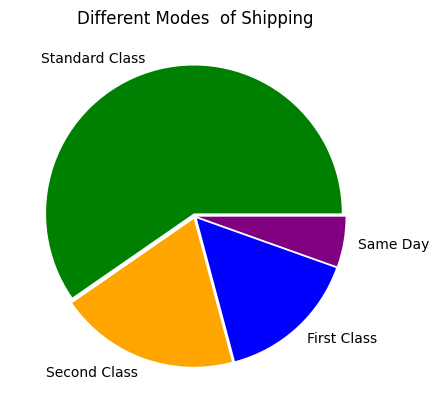

In [14]:
plt.pie(data["Ship Mode"].value_counts(),labels=np.array(["Standard Class","Second Class","First Class","Same Day"]),colors=np.array(["green","orange","blue","purple"]),explode=[0.02,0.02,0.02,0.02])
plt.title("Different Modes  of Shipping")
plt.show()

From this We can say most of customers i.e.., more than 60%-70% prefer Standard Class Shipping.

In [33]:
data["Profit"].groupby(data["Ship Mode"]).mean()

Ship Mode
First Class       31.946733
Same Day          29.283924
Second Class      29.585560
Standard Class    27.637378
Name: Profit, dtype: float64

In [34]:
data["Discount"].groupby(data["Ship Mode"]).mean()

Ship Mode
First Class       0.164840
Same Day          0.152675
Second Class      0.138666
Standard Class    0.160433
Name: Discount, dtype: float64

More profits and offers(discounts) are on First Class Shipping mode.

**Analysis on the basis of States**

In [15]:
State=data["State"].unique()

In [16]:
print(State)

['Kentucky' 'California' 'Florida' 'North Carolina' 'Washington' 'Texas'
 'Wisconsin' 'Utah' 'Nebraska' 'Pennsylvania' 'Illinois' 'Minnesota'
 'Michigan' 'Delaware' 'Indiana' 'New York' 'Arizona' 'Virginia'
 'Tennessee' 'Alabama' 'South Carolina' 'Oregon' 'Colorado' 'Iowa' 'Ohio'
 'Missouri' 'Oklahoma' 'New Mexico' 'Louisiana' 'Connecticut' 'New Jersey'
 'Massachusetts' 'Georgia' 'Nevada' 'Rhode Island' 'Mississippi'
 'Arkansas' 'Montana' 'New Hampshire' 'Maryland' 'District of Columbia'
 'Kansas' 'Vermont' 'Maine' 'South Dakota' 'Idaho' 'North Dakota'
 'Wyoming' 'West Virginia']


In [17]:
data["Profit"].groupby(data["State"]).sum()

State
Alabama                  5786.8253
Arizona                 -3427.9246
Arkansas                 4008.6871
California              76215.9705
Colorado                -6527.8579
Connecticut              3511.4918
Delaware                 9977.3748
District of Columbia     1059.5893
Florida                 -3399.3017
Georgia                 16250.0433
Idaho                     826.7231
Illinois               -12593.2976
Indiana                 18382.9363
Iowa                     1183.8119
Kansas                    836.4435
Kentucky                11199.6966
Louisiana                2196.1023
Maine                     454.4862
Maryland                 7031.1788
Massachusetts            6785.5016
Michigan                24428.0903
Minnesota               10823.1874
Mississippi              3172.9762
Missouri                 6436.2105
Montana                  1833.3285
Nebraska                 2037.0942
Nevada                   3316.7659
New Hampshire            1706.5028
New Jersey    

States with loses

In [18]:
l=data.groupby(data["State"]).mean()
fil=l.loc[l["Profit"]<0]
print(fil)

                     Sales  Quantity  Discount     Profit
State                                                    
Arizona         157.508933  3.848214  0.303571 -15.303235
Colorado        176.418231  3.807692  0.316484 -35.867351
Florida         233.612815  3.600522  0.299347  -8.875461
Illinois        163.525243  3.755102  0.389592 -25.700607
North Carolina  223.305880  3.947791  0.283534 -30.083985
Ohio            166.617017  3.754274  0.325000 -36.237859
Oregon          141.632374  4.040650  0.289431  -9.708124
Pennsylvania    200.314991  3.671256  0.329948 -26.835309
Tennessee       167.551219  3.721311  0.291257 -29.189583
Texas           173.572579  3.785714  0.370449 -26.278738


<ipython-input-18-709e021fab52>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  l=data.groupby(data["State"]).mean()


states with profits

In [19]:
l=data.groupby(data["State"]).mean()
fil=l.loc[l["Profit"]>0]
print(fil)

                            Sales  Quantity  Discount      Profit
State                                                            
Alabama                319.846557  4.196721  0.000000   94.865989
Arkansas               194.635500  4.000000  0.000000   66.811452
California             230.621176  3.839394  0.073157   38.492914
Connecticut            163.223866  3.426829  0.007317   42.823071
Delaware               285.948635  3.822917  0.006250  103.930988
District of Columbia   286.502000  4.000000  0.000000  105.958930
Georgia                266.825217  3.831522  0.000000   88.315453
Idaho                  208.689810  3.047619  0.085714   39.367767
Indiana                359.431946  3.879195  0.000000  123.375411
Iowa                   152.658667  3.733333  0.000000   39.460397
Kansas                 121.429583  3.083333  0.000000   34.851813
Kentucky               263.250000  3.762590  0.000000   80.573357
Louisiana              219.453095  3.714286  0.000000   52.288150
Maine     

<ipython-input-19-2615019389d4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  l=data.groupby(data["State"]).mean()




*  From this we can say that there are 10 states where super stores  are running in loss.
*  Also the reason behind no profits in those states are due to more dicounts on the products.



**Analysis on different categories**

In [22]:
data.groupby(data["Category"]).mean()

<ipython-input-22-4886660da55f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(data["Category"]).mean()


,Sales,Quantity,Discount,Profit
Category,,,,
Furniture,350.316304,3.789026,0.174191,8.744061
Office Supplies,119.989320,3.806549,0.157601,20.413644
Technology,453.240044,3.759219,0.132321,78.859295


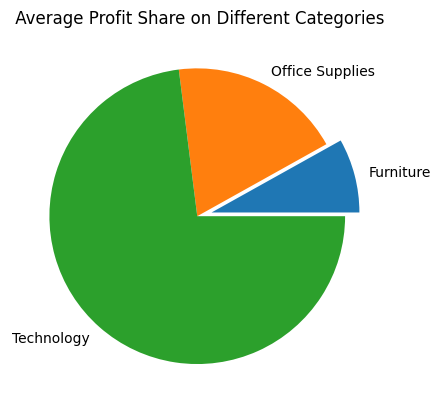

In [23]:
plt.pie(data["Profit"].groupby(data["Category"]).mean(),explode=[0.1,0,0],labels=data["Category"].unique())
plt.title(" Average Profit Share on Different Categories")
plt.show()

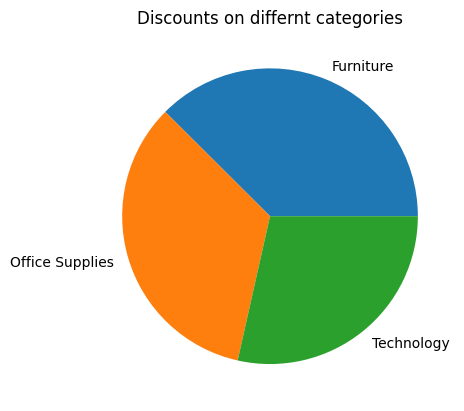

In [24]:
plt.pie(data["Discount"].groupby(data["Category"]).mean(),explode=[0,0,0],labels=data["Category"].unique())
plt.title("Discounts on differnt categories")
plt.show()

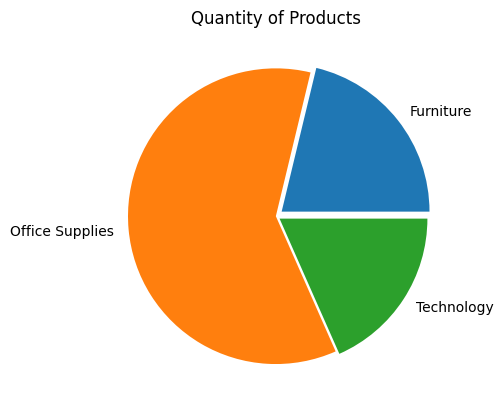

In [25]:
plt.pie(data["Quantity"].groupby(data["Category"]).sum(),explode=[0.05,0,0.030],labels=data["Category"].unique())
plt.title("Quantity of Products")
plt.show()

Here more profitable goods are Technology Goods.But More sales is on Office Supplies.Discounts on all categories are almost similar but profits of Furniture are very less when compared to other.

**Different Sub Categories and their sales**

In [26]:
data["Sub-Category"].groupby(data["Category"]).unique()

Category
Furniture                   [Bookcases, Chairs, Tables, Furnishings]
Office Supplies    [Labels, Storage, Art, Binders, Appliances, Pa...
Technology                  [Phones, Accessories, Machines, Copiers]
Name: Sub-Category, dtype: object

In [27]:
data["Sub-Category"][data['Category']=="Furniture"].value_counts()

Furnishings    954
Chairs         615
Tables         319
Bookcases      226
Name: Sub-Category, dtype: int64

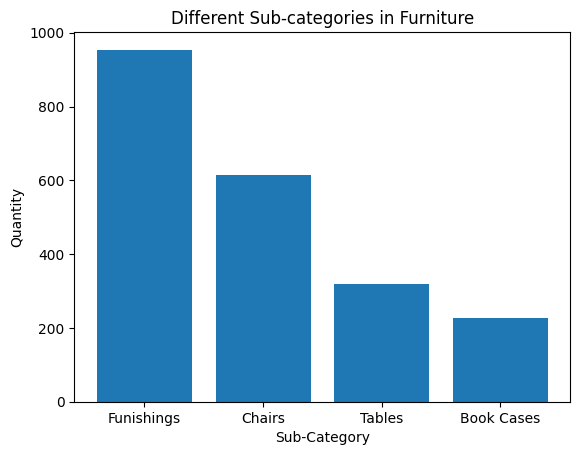

In [28]:
plt.bar(np.array(["Funishings","Chairs","Tables","Book Cases"]),data["Sub-Category"][data['Category']=="Furniture"].value_counts())
plt.title("Different Sub-categories in Furniture")
plt.xlabel("Sub-Category")
plt.ylabel("Quantity")
plt.show()

In [29]:
data["Sub-Category"][data['Category']=="Technology"].value_counts()

Phones         888
Accessories    773
Machines       115
Copiers         68
Name: Sub-Category, dtype: int64

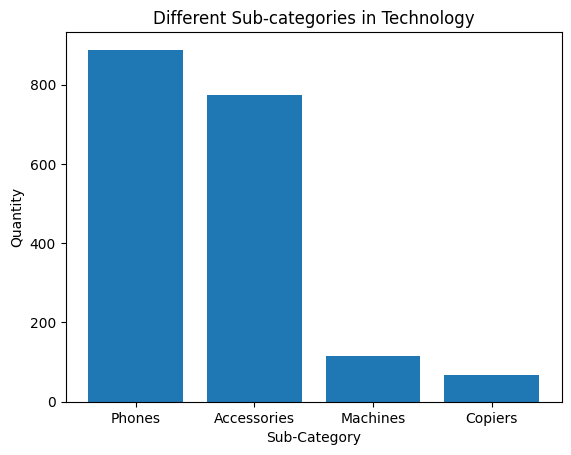

In [30]:
plt.bar(np.array(["Phones","Accessories","Machines","Copiers"]),data["Sub-Category"][data['Category']=="Technology"].value_counts())
plt.title("Different Sub-categories in Technology")
plt.xlabel("Sub-Category")
plt.ylabel("Quantity")
plt.show()

In [31]:
data["Sub-Category"][data['Category']=="Office Supplies"].value_counts()

Binders       1518
Paper         1344
Storage        845
Art            793
Appliances     466
Labels         359
Envelopes      254
Fasteners      217
Supplies       190
Name: Sub-Category, dtype: int64

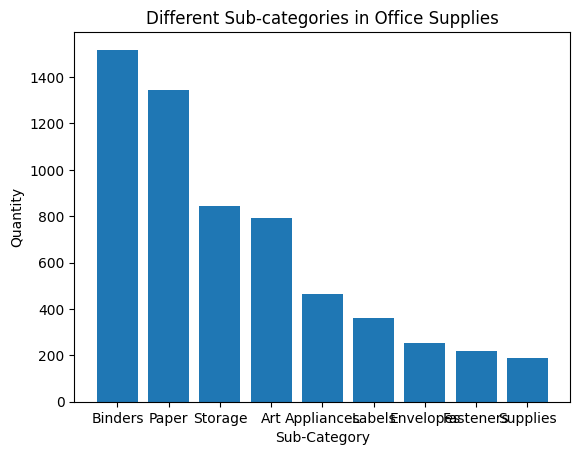

In [32]:
plt.bar(np.array(["Binders","Paper","Storage","Art","Appliances","Labels","Envelopes","Fasteners","Supplies"]),data["Sub-Category"][data['Category']=="Office Supplies"].value_counts())
plt.title("Different Sub-categories in Office Supplies")
plt.xlabel("Sub-Category")
plt.ylabel("Quantity")
plt.show()